# Appendix X: The Variance of Residuals 

In [1]:
"""Imports necessary packages"""

import itertools
import math
from typing import Dict, Iterable, List, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")

In [2]:
def make_scatterplot(x_data: Iterable, y_data: Iterable, xlabel: str = "x", ylabel: str = "y", title: str = "A scatterplot") -> None:
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [3]:
data = pd.read_csv("D:/School/frequentist-statistics/ITM-song-popularity/database/itm_songs_preprocessed.csv")
data = data.drop("Unnamed: 0", axis=1)

In [4]:
models = ["popularity_abs ~ age_days + complexity + track_number", "popularity_norm ~ age_days + complexity + track_number", "popularity_abs ~ age_days + complexity + track_number + track_number*duration + danceability + duration", "popularity_norm ~ age_days + complexity + track_number + track_number*duration + danceability + duration", "popularity_abs ~ track_number + duration + danceability + age_days", "popularity_norm ~ track_number + duration + danceability + age_days", "popularity_abs ~ track_number + duration + speechiness + age_days + duration*complexity + danceability*valence + danceability*complexity", "popularity_norm ~ track_number + duration + speechiness + age_days + duration*complexity + danceability*valence + danceability*complexity"]

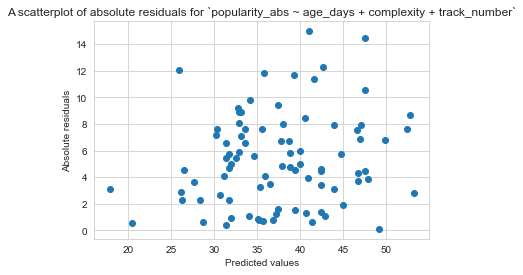

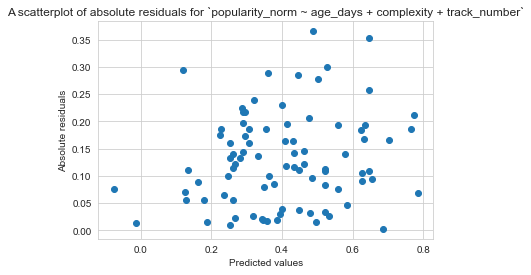

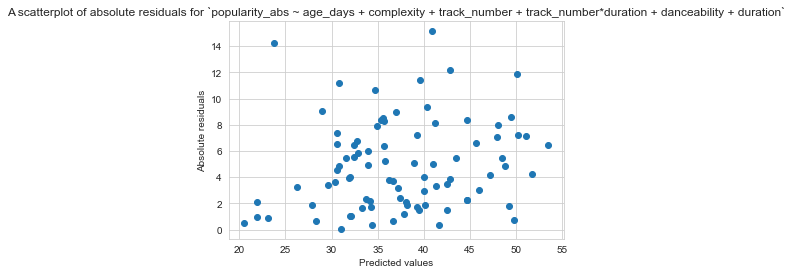

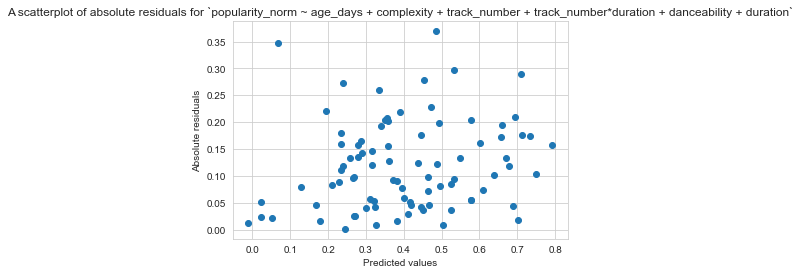

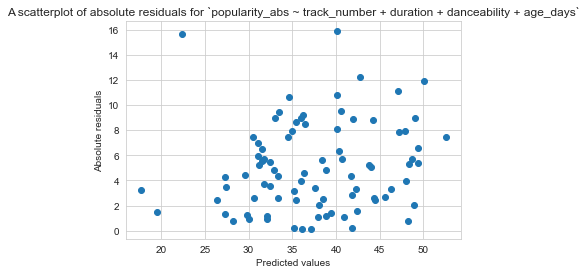

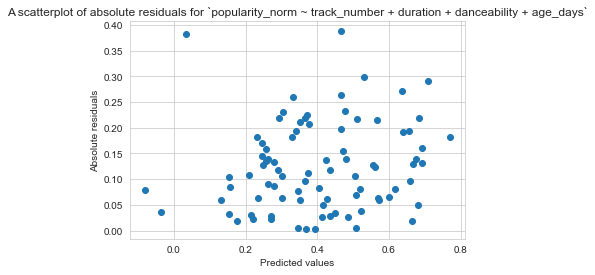

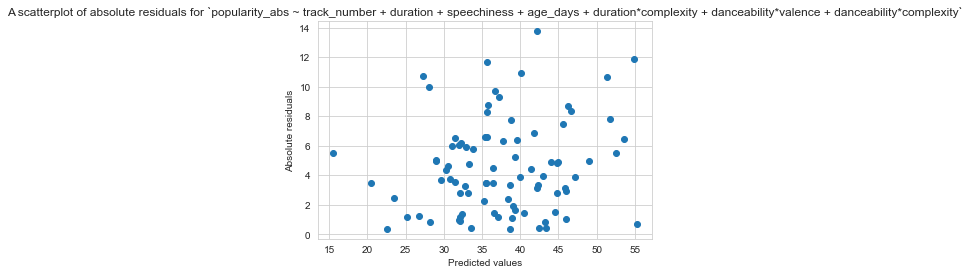

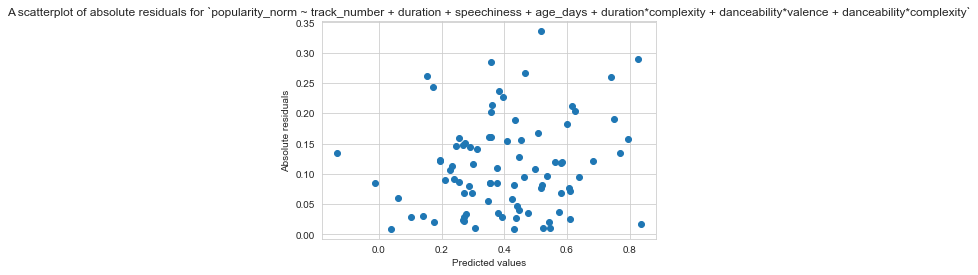

In [5]:
for model_str in models:
    model = sm.formula.ols(model_str, data=data).fit()
    pred_y = np.asarray(model.predict(data))
    make_scatterplot(pred_y, np.absolute(model.resid), xlabel="Predicted values", ylabel="Absolute residuals", title="A scatterplot of absolute residuals for `%s`" % model_str)